In [1]:
""" @author: bhushan
    
"""
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from synthetic_data_experiment_functions import *

**Important differences between ToyMultiAttribute (TMA) Outputs and these plots:**
* The inputs and outputs here are integers whereas the TMA ones are floats.
* The outputs of TMA have only two races. The runs here have 2 races as inputs but > 2 races as outputs.
* The TMA plots are made of 1000 runs each, these are 100 runs each. (Because of time constraints. 100 runs takes about an hour on AWS. 4 eps budgets x 3 split permutations = 12 plots took roughly 12 hrs to complete.)

In [2]:
# setting some variables we will need
state_id = 1     # FIPS code of Alabama, from which I extracted the 1940s lines
race = 1         # The race we compare for ER is coded in as `1` in our inputs.
num_runs = 100   # Each configuration had 100 runs.
synthetic_data_dir = "./cleaned_synthetic/"     # filepath to runs on synthetically generated data
full_county_data_dir = "./cleaned_full_county/" # filepath to runs on 9 full districts

# just setting coordinates to position each plot
synthetic_exp2coords_map = dict({
    "synthetic_bottom_heavy_0point25.ini": (0,2),
    "synthetic_mid_heavy_0point25.ini": (0,1),
    "synthetic_top_heavy_0point25.ini": (0,0),
    "synthetic_bottom_heavy_0point50.ini": (1,2),
    "synthetic_mid_heavy_0point50.ini": (1,1),
    "synthetic_top_heavy_0point50.ini": (1,0),
    "synthetic_bottom_heavy_1.ini": (2,2),
    "synthetic_mid_heavy_1.ini": (2,1),
    "synthetic_top_heavy_1.ini": (2,0),
    "synthetic_bottom_heavy_2.ini": (3,2),
    "synthetic_mid_heavy_2.ini": (3,1),
    "synthetic_top_heavy_2.ini": (3,0)
})

full_county_exp2coords_map = dict({
    "full_county_bottom_heavy_0point25.ini": (0,2),
    "full_county_mid_heavy_0point25.ini": (0,1),
    "full_county_top_heavy_0point25.ini": (0,0),
    "full_county_bottom_heavy_0point50.ini": (1,2),
    "full_county_mid_heavy_0point50.ini": (1,1),
    "full_county_top_heavy_0point50.ini": (1,0),
    "full_county_bottom_heavy_1.ini": (2,2),
    "full_county_mid_heavy_1.ini": (2,1),
    "full_county_top_heavy_1.ini": (2,0),
    "full_county_bottom_heavy_2.ini": (3,2),
    "full_county_mid_heavy_2.ini": (3,1),
    "full_county_top_heavy_2.ini": (3,0)
})

"""
What the districts from which I extracted lines were originally called. The keys are counties
and the arrays corresponding to the keys are the districts within the counties.
These dicts will be mapped as 
                               dict({11: [111, 112, 113],
                                     12: [121, 122, 123],
                                     13: [131, 132, 133]})

in the outputs, but we need the original mappings to know which is which.
"""
synthetic_county_dists = dict({10: [11, 12, 20],
                               30: [10, 20, 30],
                               50: [10, 20, 30]})

full_county_name_map = dict({10: [11, 12, 20],
                             30: [30, 40, 50],
                             50: [20, 30, 40]})

In [3]:
def plot_experiments(data_dir, experiment2coords_map, state_id, race, county_dists, er=True):
    fig, axs = plt.subplots(4, 3, figsize=(20,20))
    
    for (key, coords) in experiment2coords_map.items():
        dir_name = data_dir + key
        runs_df = collect_run_percents_by_race(dir_name, state_id, race, county_dists)
                
        if er: 
            plot(runs_df, num_runs, axs, coords)
        else:
            plot(runs_df, num_runs, axs, coords, hist=True)

    # Label the budget and the splits to the figure
    # these splits go from top to bottom
    axs[0, 0].set_title("Splits[0.50, 0.25, 0.25]")
    axs[0, 1].set_title("Splits[0.25, 0.50, 0.25]")
    axs[0, 2].set_title("Splits[0.25, 0.25, 0.50]")

    pad = 5
    axs[0,0].annotate("Budget:0.25", xy=(0, 0.5), xytext=(-axs[0,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[0,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[1,0].annotate("Budget:0.50", xy=(0, 0.5), xytext=(-axs[1,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[1,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[2,0].annotate("Budget:1.00", xy=(0, 0.5), xytext=(-axs[2,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[2,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[3,0].annotate("Budget:2.00", xy=(0, 0.5), xytext=(-axs[3,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[3,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')

    return fig

### Synthetic Dataset
The total populations in these 9 precincts are:     [345, 366, 260, 289, 294, 279, 200, 211, 151]

The populations of race A in these 9 precincts are: [60, 101, 102, 112, 100, 116, 120, 161, 138]

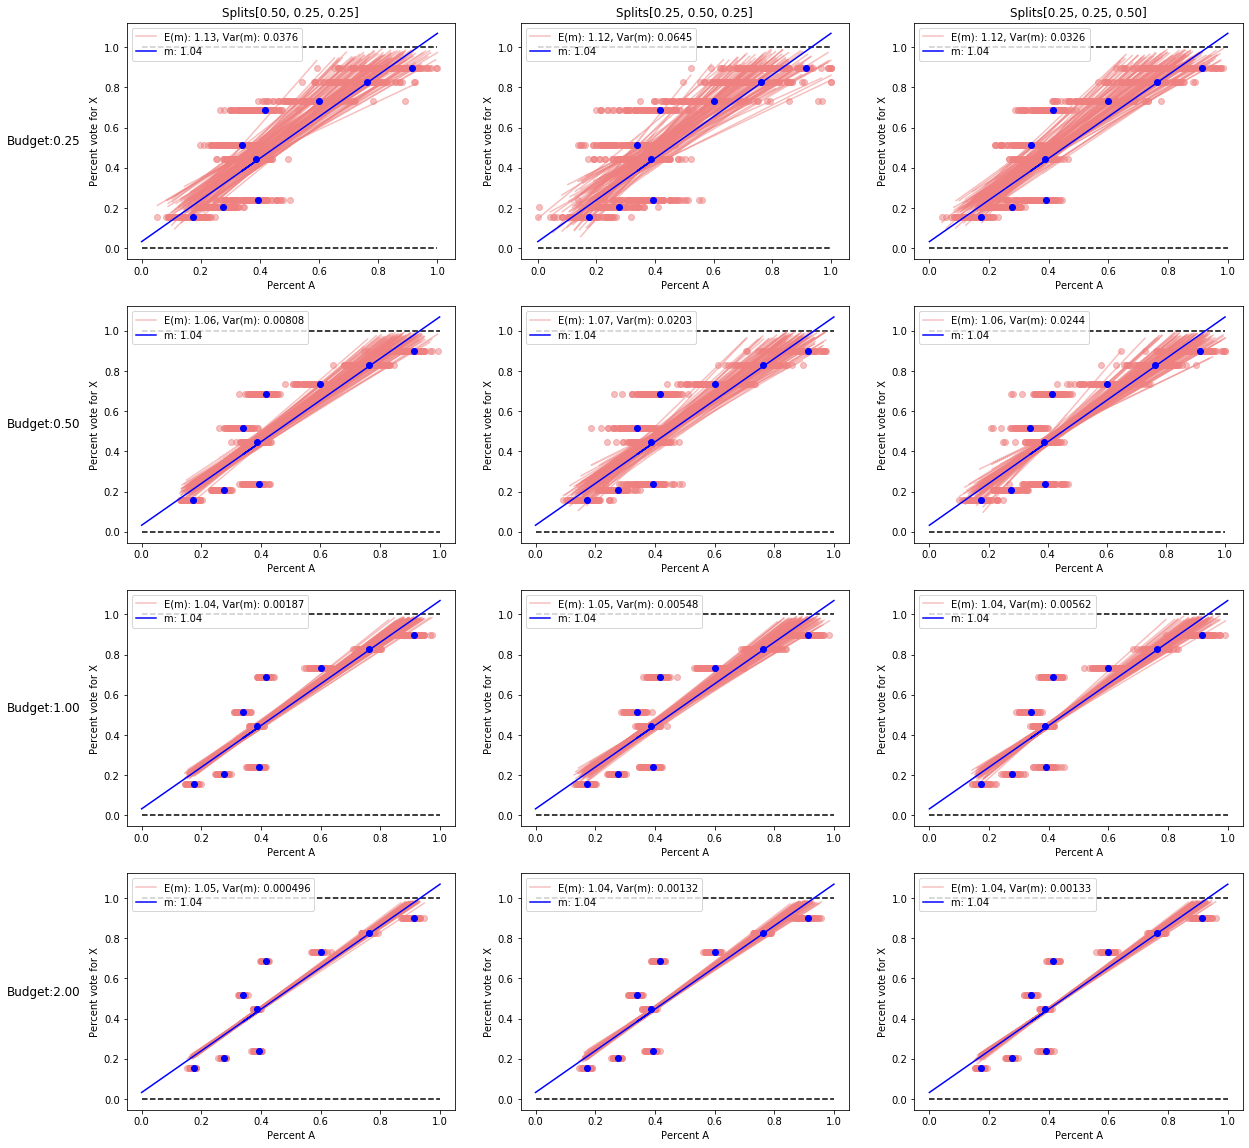

In [4]:
er_fig = plot_experiments(synthetic_data_dir, 
                          synthetic_exp2coords_map, 
                          state_id, 
                          race, 
                          synthetic_county_dists,
                          er=True)

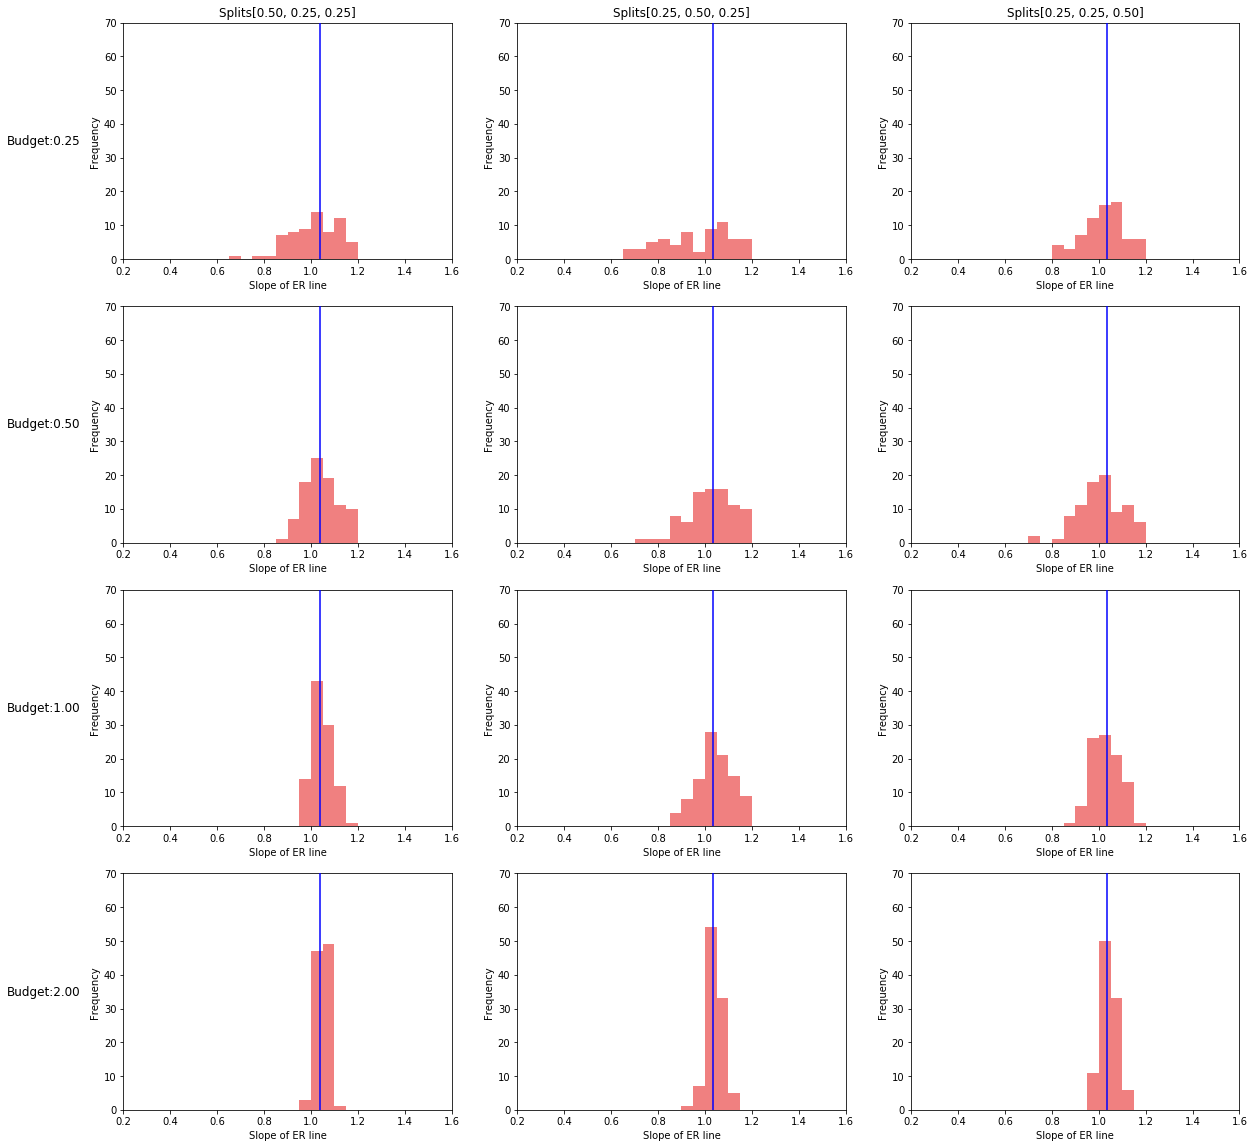

In [5]:
hist_fig = plot_experiments(synthetic_data_dir, 
                            synthetic_exp2coords_map, 
                            state_id, 
                            race, 
                            synthetic_county_dists,
                            er=False)

In [6]:
# er_fig.savefig("synthetic_data_ER.pdf")
# The best strategy I have found to generate high quality pngs is to save the figure as a PDF and then run 
# the following line on the command line. TODO: there needs to be a cleaner way to do this.
# pdftoppm -png -r 300 synthetic_data_ER.pdf synthetic_data_ER

# hist_fig.savefig("synthetic_data_hists.pdf")
# The best strategy I have found to generate high quality pngs is to save the figure as a PDF and then run 
# the following line on the command line. TODO: there needs to be a cleaner way to do this.
# pdftoppm -png -r 300 synthetic_data_hists.pdf synthetic_data_hists

### Full Enumdist Dataset
In the previous input dataset, I simply extracted the requisite number of lines I needed from each enumdist I wanted. In the following example, I extract the _entire_ enumdist, so the populations are larger. I however do modify the races of these lines to match the ratios in the previous dataset.

The total populations in these 9 enumdists are: [1367, 1299, 2628, 1783, 1770, 1317, 1839, 1040, 876]

The populations of race A in these 9 precincts are: [237, 358, 1030, 690, 602, 547, 1103, 793, 800]

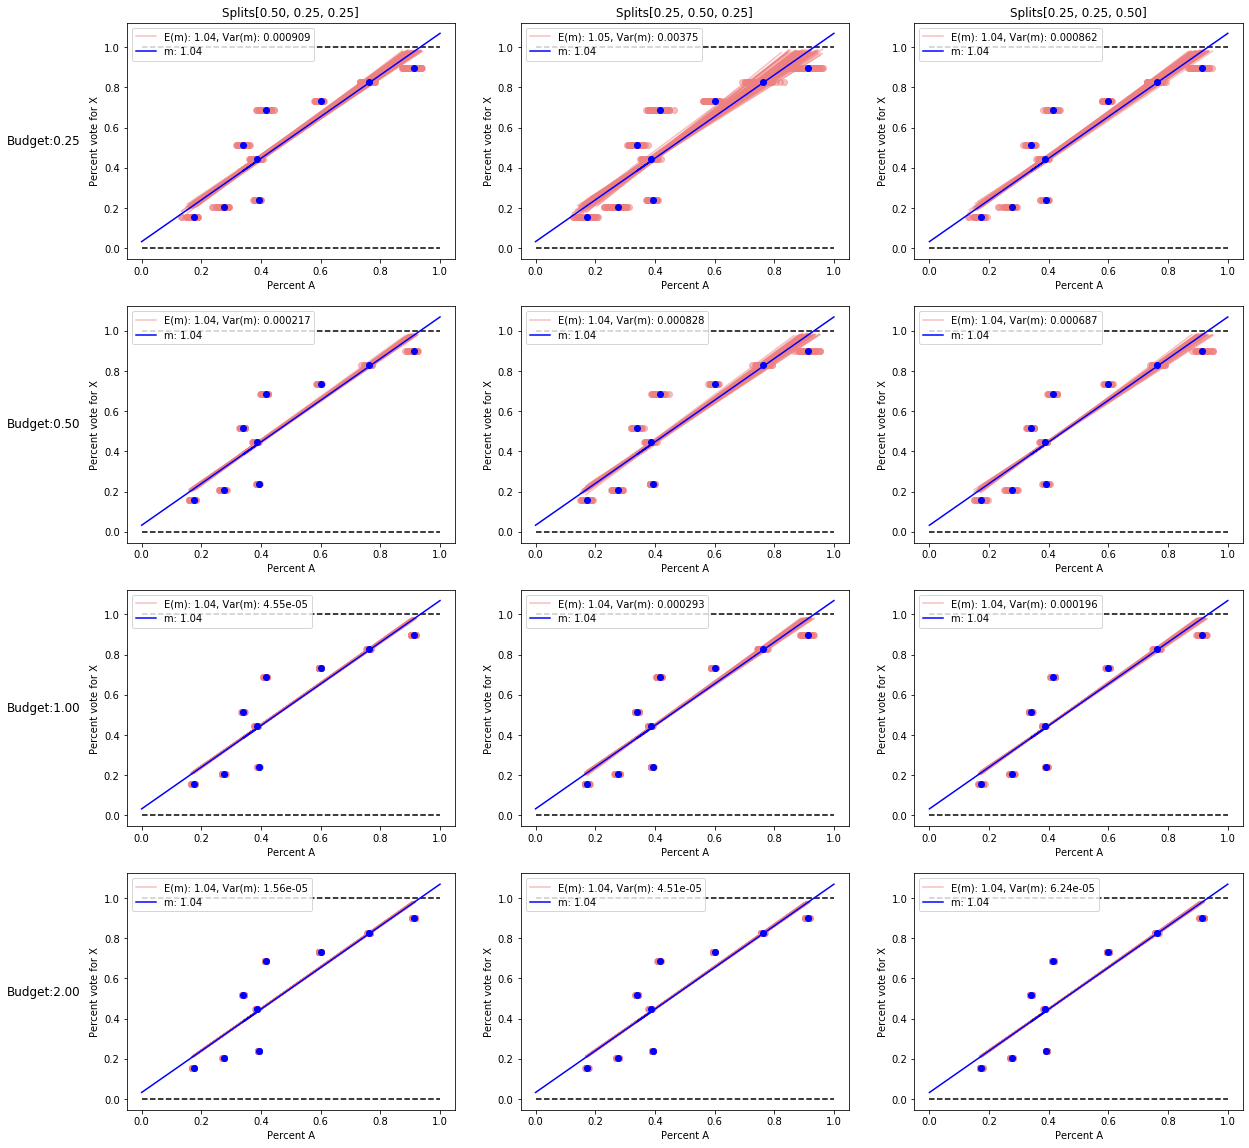

In [7]:
er_fig = plot_experiments(full_county_data_dir, 
                          full_county_exp2coords_map, 
                          state_id, 
                          race, 
                          full_county_name_map, 
                          er=True)

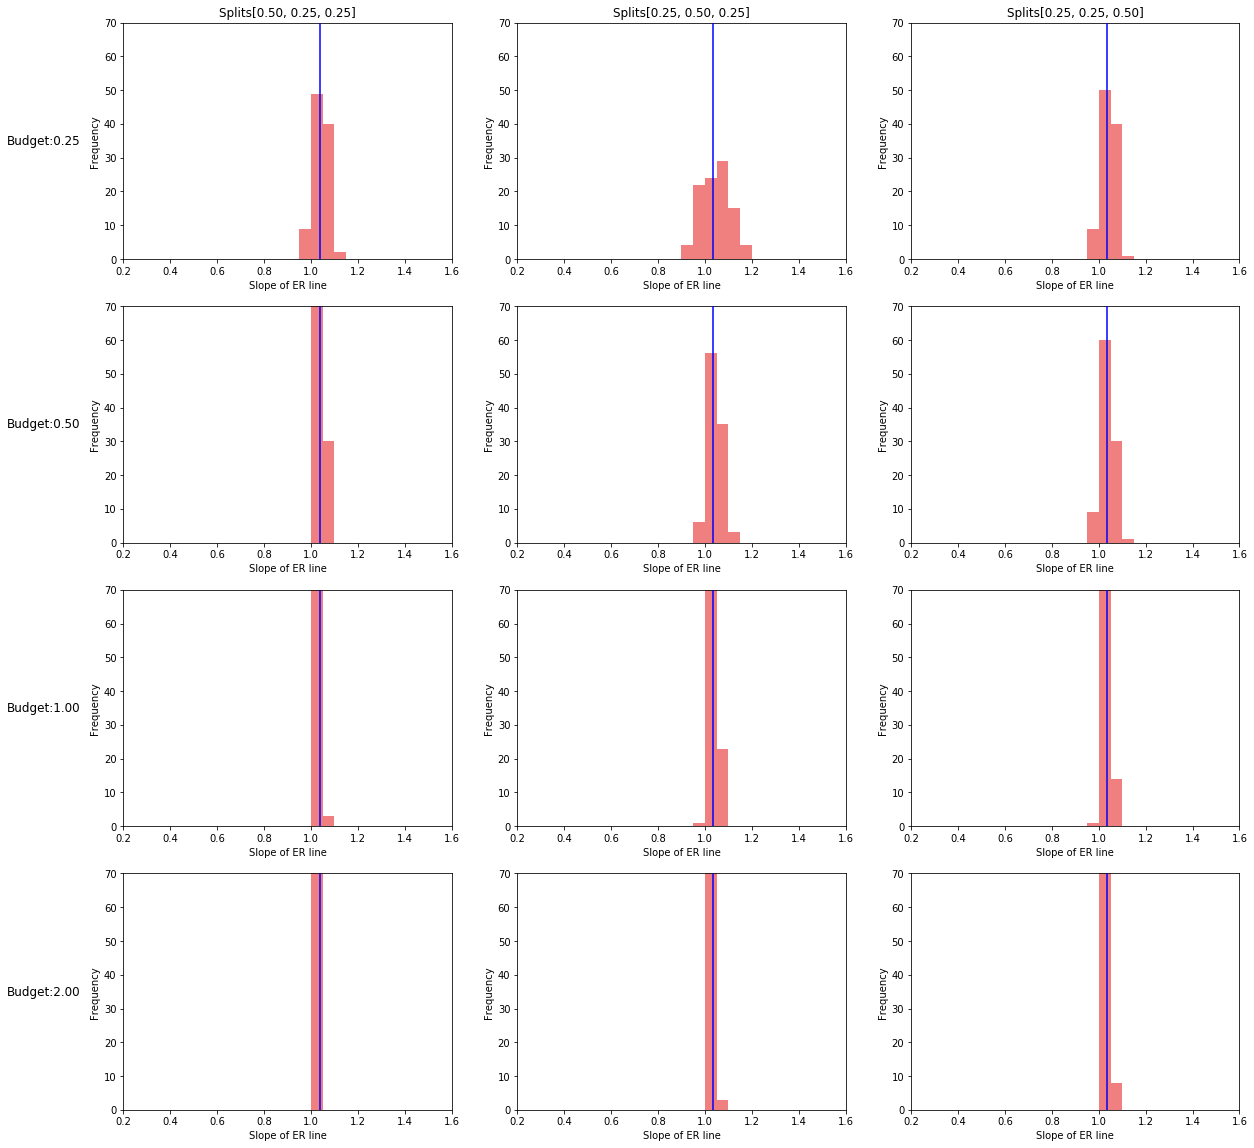

In [8]:
hist_fig = plot_experiments(full_county_data_dir, 
                            full_county_exp2coords_map, 
                            state_id, 
                            race, 
                            full_county_name_map,  
                            er=False)

### Do these plots make sense?
Vertically: 

One would expect that with increased epsilon budget, the noise added would decrease, so the change in slope would be small. That is what we observe, so that makes sense. 

Horizontally:

It is unclear the effect of the splits on the graphs. Surprisingly (for me) it seems that more change in slope is observed when there is more budget on the middle level.